## Домашняя работа 3

### Ирина Соколова

### VK API

Установите библиотеку [vk](https://github.com/dimka665/vk) для работы с VK API в Python:

** pip install vk **

Импортируйте данную библиотеку: 

In [1]:
import vk

После установки модуля, необходимо [создать приложение на сайте VK](https://vk.com/dev/native_create)

После регистрации приложения, понадобится только его **ID**. Его можно найти во вкладке **Настройки**.

Теперь создайте файл credentials.py (подобно тому, которой мы создавали на семинаре 8), который должен выглядеть следующим образом:

In [ ]:
id_app = '... ID приложения ...'
login = '... Ваш логин в вк ...'
password = '... Ваш пароль в вк ...'

Авторизуйтесь:

In [2]:
from credentials import *

session = vk.AuthSession(id_app, login, password)

2018-03-04 18:00:54,232 vk    mixins:127 INFO: Getting permissions


При такой авторизации нужно указывать не только логин, пароль и ID приложения, но и то, к чему мы хотим получить доступ. Для того чтобы данный код сработал корректно, при авторизации нужно указать дополнительно аргумент с названием scope и перечислить через запятую те методы, доступ к которым мы хотим получить. Например:

In [3]:
session = vk.AuthSession(id_app, login, password, scope='wall')
vk_api = vk.API(session)

2018-03-04 18:00:57,118 vk    mixins:127 INFO: Getting permissions


In [4]:
postnauka = vk_api.wall.get(v=5.73, owner_id=-36507793, domain='postnauka', count=100)
wonderzine = vk_api.wall.get(v=5.73, owner_id=-54218032, domain='wonderzine', count=100)
rgbm = vk_api.wall.get(v=5.73, owner_id=-10429260, domain='rgubru', count=100)
kronoki = vk_api.wall.get(v=5.73, owner_id=-63043584, domain='kronoki', count=100)
shastye = vk_api.wall.get(v=5.73, owner_id=-98382141, domain='zaiki_luzhaiki', count=100)

В данном примере я запрашиваю доступ к стене. Названия методов, к которым возможно получить доступ можно посмотреть на [этой странице документации](https://vk.com/dev/objects).

**Задача 1. Формирование корпуса текстов** (10 баллов) 

Найдите две или более группы, которые публикуют достаточно содержательные посты (например, новости и т.п.). Тематика групп должна быть различной. 

С помощью [wall.get](https://vk.com/dev/wall.get) скачайте посты данных групп и сформируйте корпуса текстов, используя возможности [pandas](https://pythonspot.com/category/pandas/).

#### Я взяла пять групп: Постнаука, Wonderzine, Российская государственная библиотека для молодёжи, Кроноцкий государственный заповедник и Щастьематеринства.

In [5]:
def get_texts(wall_posts):
    texts = []
    posts = wall_posts.get('items') #список постов
    for post in posts:
        texts.append(post.get('text'))

    return texts

    
    
    

Посмотрим на первые посты в каждой группе. 

In [6]:
print("Постнаука:\n%s\n" % get_texts(postnauka)[0])
print("Wonderzine:\n%s\n" % get_texts(wonderzine)[0])
print("РГБМ:\n%s\n" % get_texts(rgbm)[0])
print("Кроноцкий государственный заповедник:\n%s\n" % get_texts(kronoki)[0])
print("Щастьематериинства:\n%s\n" % get_texts(shastye)[0])


Постнаука:
Будущее уже наступило. 65% нынешних первоклассников получат профессии, которых на данный момент еще не существует. Современная система образования готовит ребенка к жизни в стабильном мире и не отвечает вызовам, перед которыми оказывается человек XXI века. Чтобы быть успешными и угнаться за переменами, наши дети и мы сами должны постоянно учиться и быть готовыми к новым условиям жизни и технологиям. 

https://postnauka.ru/specials/learning_to_learn

Совместно с Благотворительным фондом Сбербанка [club135187906|«Вклад в будущее»] мы запускаем проект «Учить учиться», посвященный самым важным аспектам обучения в постоянно меняющемся мире.

#УчитьУчиться

Wonderzine:
«Моей задачей было доказать всему миру, что ведьмы никогда никуда не исчезали»: Катаржина Маяк отыскала в современной Польше колдуний, друидов, знахарок, повитух и других представительниц альтернативных верований и попыталась понять, чему их духовный опыт может научить женщин XXI века

РГБМ:
6 марта в 19:00 мы пригл

In [7]:
postnauka_texts = get_texts(postnauka)
wonderzine_texts = get_texts(wonderzine)
rgbm_texts = get_texts(rgbm)
kronoki_texts = get_texts(kronoki)
shastye_texts = get_texts(shastye)

**Задача 2. Предобработка ** (15 баллов)

Предобработайте корпуса текстов: 
* Очистите тексты от мусора, используя [регулярные выражения](https://docs.python.org/2/library/re.html)
* [Лемматизируйте текст](https://github.com/arinaaageeva/Lemmatization)
* Удалите стоп-слова

Список стоп-слов можно получить с помощью модуля [stop-words](https://pypi.python.org/pypi/stop-words)

In [8]:
import re
import pymorphy2
import nltk
from nltk.tokenize import word_tokenize
from stop_words import get_stop_words
from tqdm import tqdm_notebook as tqdm

In [9]:
stop_words = get_stop_words('russian')

In [10]:
def clean(txt):
    txt = re.sub(r'@[^ ]*', ' ', txt.lower())
    txt = re.sub(r'#[^ ]*', ' ', txt)
    txt = re.sub(r'https?://\w.*', ' ', txt)
    txt = re.sub(r'[0-9]', ' ', txt)
    txt = re.sub(r'\'[^ ]+', ' ', txt)
    txt = re.sub(r'[^а-я ]', ' ', txt)
    txt = re.sub(r' +', ' ', txt)
    
    return txt.strip()

Сначала я не стала убирать из текстов латинский буквы. В результате в топ-20 попали довольно бессмысленные английские слова, зато почему-то визуализации были чуть-чуть покрасивее. 

In [11]:
def lemmatize(txt):
    morph = pymorphy2.MorphAnalyzer()
    text_lemma_list = [morph.parse(token)[0].normal_form for token in word_tokenize(txt)]
    return text_lemma_list
    

In [12]:
def remove_stop_words(txt_lst):
    no_stop = [word for word in txt_lst if word not in stop_words]
    result = ' '.join(no_stop)
    return result

In [13]:
def preprocess(txt):
    text = clean(txt)
    text = lemmatize(text)
    text = remove_stop_words(text)
    return text
    
    

Посмотрим, как обрабывается текст. Было:

In [14]:
print(rgbm_texts[90])

9 января в 19:00 мы приглашаем в зал «Музыкальный подвал» всех любителей джаза.

На этот раз руководитель джазового клуба «Консилиум» Владимир Обруч познакомит гостей с жизнью и творчеством канадской джазовой певицы Холли Коул (Holly Cole), особенно популярной в Канаде и Японии как за её разносторонний и оригинальный голос, так и за её репертуар, который охватывает такие разные жанры, как шоу-мелодии, рок-, кантри-музыка. А также с творчеством американского барабанщика Пола Вертико (Paul Wertico). Он получил признание как член Pat Metheny Group с 1983 по 2001 годы.

Вы узнаете интересные факты из биографии известных музыкантов, послушаете музыкальные произведения, а также посмотрите редкие концертные программы.

Ведущий: Владимир Обруч, музыкальный критик. Гость встречи: Тырин Валерий Васильевич, джазовый гитарист, преподаватель.

Вход свободный.

#афиша@rgubru #джазовыеимпровизации #музподвал #ДжазовыйКлубКонсилиум #HollyCole #PaulWertico


Стало:

In [15]:
print(preprocess(rgbm_texts[90]))

январь приглашать зал музыкальный подвал любитель джаз руководитель джазовый клуб консилиум владимир обруч познакомить гость творчество канадский джазовый певица холли коул популярный канада япония разносторонний оригинальный голос репертуар охватывать разный жанр шоу мелодия рок кантри музыка творчество американский барабанщик полый вертико получить признание член узнать интересный факт биография известный музыкант послушать музыкальный произведение посмотреть редкий концертный программа ведущий владимир обруч музыкальный критик гость встреча тырина валерий василий джазовый гитарист преподаватель вход свободный


In [16]:
groups = [postnauka_texts, wonderzine_texts, rgbm_texts, kronoki_texts, shastye_texts]
groups_processed = []

for group in tqdm(groups):
    txts = []
    for text in group:
        txt = preprocess(text)
        txts.append(txt)
    group = txts
    groups_processed.append(group)

print(len(groups_processed))

HBox(children=(IntProgress(value=0, max=5), HTML(value='')))


5


In [17]:
postnauka = ' '.join(groups_processed[0])
    
wonderzine = ' '.join(groups_processed[1])

rgbm = ' '.join(groups_processed[2])

kronoki = ' '.join(groups_processed[3])

shastye = ' '.join(groups_processed[4])


In [18]:
corpus = [postnauka, wonderzine, rgbm, kronoki, shastye]

print(len(corpus))

5


** Задача 3. Выделение признаков** (5 баллов)

Воспользуйтесь [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) для векторизации текстов. 

Сначала нужно создать и обучить vectorizer:

```

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words=<сюда передайте список стоп слов>).fit(<сюда передайте весь корпус текстов>)
```

Что бы преообразовать тексты в векторное представление используйте метод transform:
```
tfidf_vectors = vectorizer.transform(<список текстов>)
```
Получение списка имён признаков:
```
features_names = vectorizer.get_features_name()
```
Для каждой группы получите список топ-токенов и выведите .

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

In [20]:
vectorizer = TfidfVectorizer(stop_words=stop_words).fit(corpus)
tfidf_vectors = vectorizer.transform(corpus)
feature_names = vectorizer.get_feature_names()

In [21]:
tfidf_vectors.shape

(5, 7343)

In [22]:
type(tfidf_vectors)

scipy.sparse.csr.csr_matrix

In [23]:
tfidf = tfidf_vectors.toarray()
type(tfidf)

numpy.ndarray

In [24]:
postnauka_top = tfidf[0]
postnauka_top.shape

(7343,)

In [25]:
postnauka_scores = list(postnauka_top)

Выведем топ-20 слов для Постнауки:

In [26]:
postnauka_word_scores = list(zip(postnauka_scores, feature_names))
top = sorted(postnauka_word_scores, reverse=True)[:20] 
for score, word in top:
    print(word, '{0:.6f}'.format(score))

тест 0.326755
учиться 0.145333
учить 0.138750
социолог 0.120384
историк 0.120384
установка 0.103657
технология 0.103657
лекция 0.103657
физиолог 0.103186
отрывок 0.103186
дубынин 0.103186
книга 0.098337
образование 0.092140
ребёнок 0.087200
убеждение 0.085988
солнце 0.085988
изобретение 0.085988
зрение 0.083250
внутренний 0.083250
разный 0.081948


Топ-слова для Wonderzine:

In [27]:
wonderzine_top = tfidf[1]
wonderzine_scores = list(wonderzine_top)
wonderzine_word_scores = list(zip(wonderzine_scores, feature_names))
wond_top = sorted(wonderzine_word_scores, reverse=True)[:20] 
for score, word in wond_top:
    print(word, '{0:.6f}'.format(score))

женщина 0.192072
рассказывать 0.151623
слуцкий 0.113642
женский 0.113642
домогательство 0.113642
разбираться 0.110023
коллекция 0.110023
новый 0.108302
секс 0.106551
фильм 0.102439
режисса 0.091686
средство 0.091329
любимый 0.091329
марка 0.090914
котов 0.090914
гервиг 0.090914
гардероб 0.090914
красивый 0.076829
снять 0.076108
серия 0.076108


Топ-20 в группе РГБМ:

In [28]:
rgbm_top = tfidf[2]
rgbm_scores = list(rgbm_top)
rgbm_word_scores = list(zip(rgbm_scores, feature_names))
rg_top = sorted(rgbm_word_scores, reverse=True)[:20] 
for score, word in rg_top:
    print(word, '{0:.6f}'.format(score))

вход 0.220060
встреча 0.202966
клуб 0.202043
музыкальный 0.191941
зал 0.176433
джазовый 0.166686
лекция 0.148842
свободный 0.147976
январь 0.146707
состояться 0.146707
английский 0.121226
ведущий 0.118180
визуальный 0.116175
февраль 0.108249
владимир 0.108249
библиотека 0.105955
комикс 0.101880
ргбм 0.101022
свой 0.098682
история 0.098682


Топ-слова в Кроноцком заповеднике:

In [29]:
kronoki_top = tfidf[3]
kronoki_scores = list(kronoki_top)
kronoki_word_scores = list(zip(kronoki_scores, feature_names))
kro_top = sorted(kronoki_word_scores, reverse=True)[:20] 
for score, word in kro_top:
    print(word, '{0:.6f}'.format(score))

заповедник 0.525719
кроноцкий 0.462270
камчатский 0.179165
фото 0.176040
заповедный 0.163154
камчатка 0.146257
кордон 0.131430
заказник 0.126898
птица 0.106037
территория 0.104237
озеро 0.102380
южный 0.091411
шпиленка 0.090641
природа 0.088020
алексей 0.080442
морской 0.078915
автор 0.068939
узона 0.067981
сотрудник 0.066385
государственный 0.065816


Топ-слова в щастьематеринства:

In [30]:
shastye_top = tfidf[4]
shastye_scores = list(shastye_top)
shastye_word_scores = list(zip(shastye_scores, feature_names))
shas_top = sorted(shastye_word_scores, reverse=True)[:20] 
for score, word in shas_top:
    print(word, '{0:.6f}'.format(score))

ребёнок 0.345351
муж 0.321093
мама 0.238457
свой 0.217913
реб 0.192233
нка 0.121678
молоко 0.116761
деньга 0.113828
родить 0.102166
работа 0.099684
квартира 0.092436
жить 0.090411
ничто 0.087571
сын 0.084713
орать 0.082706
вообще 0.081455
хороший 0.078820
дочь 0.078502
последний 0.078196
ненавидеть 0.077841


**Задача 4. Визуализация** (5 баллов)

Визуализируйте токены для каждого сообщества с помощью [WORDCLOUD](https://python-graph-gallery.com/wordcloud/)

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [32]:
post_wordcloud = WordCloud().generate(postnauka)
wond_wordcloud = WordCloud().generate(wonderzine)
rgbm_wordcloud = WordCloud().generate(rgbm)
kro_wordcloud = WordCloud().generate(kronoki)
shastye_wordcloud = WordCloud().generate(shastye)

Визуализация для Постнауки:

(-0.5, 399.5, 199.5, -0.5)

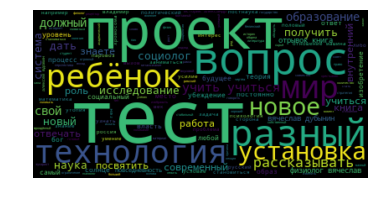

In [33]:
plt.imshow(post_wordcloud, interpolation='bilinear')
plt.axis("off")

Wonderzine:

(-0.5, 399.5, 199.5, -0.5)

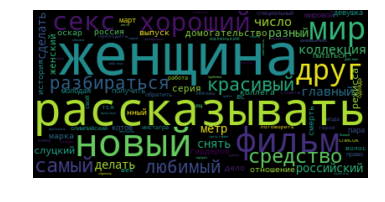

In [35]:
plt.imshow(wond_wordcloud, interpolation='bilinear')
plt.axis("off")

РГБМ:

(-0.5, 399.5, 199.5, -0.5)

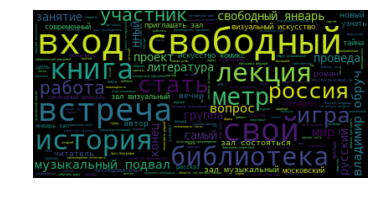

In [36]:
plt.imshow(rgbm_wordcloud, interpolation='bilinear')
plt.axis("off")

Кроноцкий заповедник:

(-0.5, 399.5, 199.5, -0.5)

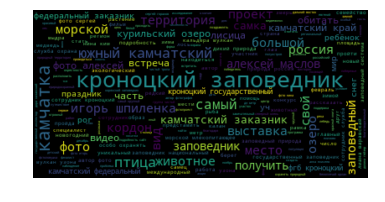

In [37]:
plt.imshow(kro_wordcloud, interpolation='bilinear')
plt.axis("off")

Щастьематеринства:

(-0.5, 399.5, 199.5, -0.5)

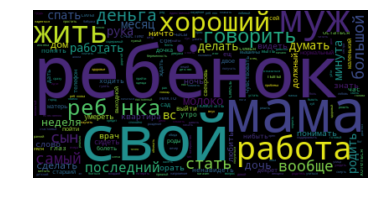

In [38]:
plt.imshow(shastye_wordcloud, interpolation='bilinear')
plt.axis("off")

**Задача 5. Поиск коллокаций** (15 баллов)

Для каждого сообщества найдите статистические значиммые коллокации с помощью PMI